<a href="https://colab.research.google.com/github/bello080/dojo_try/blob/try/%E2%80%9Ctry_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd
!ls

/content
sample_data


 １．MNISTデータセットを入手する
 

*  　importエラーを解消する。❗
*   train画像数を確認する❗
*   train画像を確認する❗
*   test画像を確認する❗
*   test画像数を確認する❗








In [ ]:
import tensorflow as tf
from keras.datasets import mnist
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
#下のはあとで使うから置いといてあげて
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

#データセットのロード(トレーニング用とテスト用で分かれている)
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

image_rows = 28
image_cols = 28
image_color = 1 #グレースケールのこと
input_shape = (image_rows, image_cols, image_color)
out_size = 10



11501568/11490434 [==============================] - 0s 0us/step


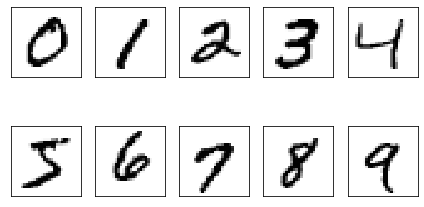

In [ ]:
# MNIST画像を表示する
import matplotlib.pyplot as plt

fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )

ax = ax.flatten()
for i in range(10):
    img = X_train[Y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
#データ整形
X_train = X_train.reshape(-1, image_rows, image_cols, image_color) / 255
X_test = X_test.reshape(-1, image_rows, image_cols, image_color) / 255

Y_train = to_categorical(Y_train,out_size)
Y_test = to_categorical(Y_test,out_size)

In [ ]:
#CNNモデル構築
model = Sequential()
#convolutional layer 1
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#convolutional layer 2
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size))
model.add(Activation('softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(
  X_train, Y_train,
  batch_size=128, epochs=2,verbose=1,
  validation_data=(X_test, Y_test)
)

Epoch 1/2
469/469 [==============================] - 138s 292ms/step - loss: 0.2347 - accuracy: 0.9246 - val_loss: 0.0507 - val_accuracy: 0.9831
Epoch 2/2
469/469 [==============================] - 137s 292ms/step - loss: 0.0662 - accuracy: 0.9792 - val_loss: 0.0291 - val_accuracy: 0.9907


In [ ]:
#モデルを保存
model.save('MNIST-model.h5')
#重みデータを保存
model.save_weights('MNIST-weights.h5')

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('正解率...', score[1], 'loss=', score[0])

313/313 [==============================] - 7s 22ms/step - loss: 0.0291 - accuracy: 0.9907
正解率... 0.9907000064849854 loss= 0.02905348129570484


In [ ]:
# NEW